<a href="https://colab.research.google.com/github/Shirui-peng/Deep-Learning-in-Quantitative-Trading/blob/main/Chapter3/01_regress_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error,
              mean_squared_log_error,
              mean_absolute_error,
              median_absolute_error)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scipy.special import huber

def huber_loss(y_true, y_pred, delta=1.0):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(huber(delta, y_true - y_pred))

## Regression

In [2]:
np.random.seed(42)

n_samples = 100
X = np.random.rand(n_samples) * 10
y_true = 3 * X + 2 + np.random.randn(n_samples) * 2
y_pred = 3.1 * X + 1.5 + np.random.randn(n_samples) * 3

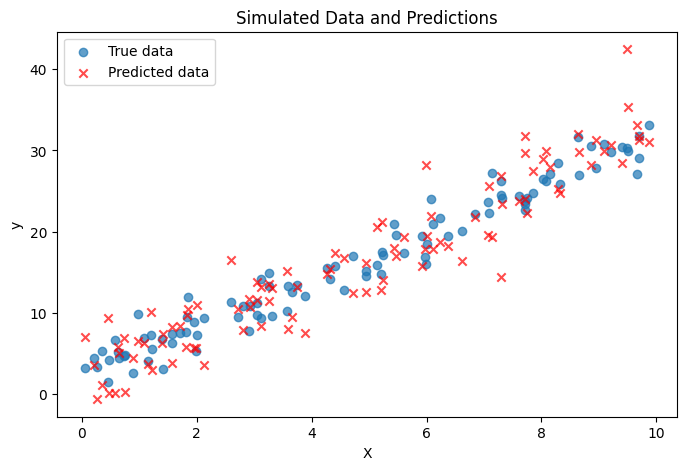

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y_true, label='True data', alpha=0.7)
plt.scatter(X, y_pred, label='Predicted data', alpha=0.7, marker='x', c='r')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulated Data and Predictions')
plt.show()

In [4]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
med_ae = median_absolute_error(y_true, y_pred)
huber = huber_loss(y_true, y_pred, delta=1.0)

In [5]:
print("------------------------------------------------")
print("MSE   :", mse)
print("RMSE  :", rmse)
print("MSLE  :", msle)
print("MAE   :", mae)
print("MedAE :", med_ae)
print("Huber :", huber)
print("------------------------------------------------")

------------------------------------------------
MSE   : 14.55862089147324
RMSE  : 3.8155760890687582
MSLE  : 0.24303606172003772
MAE   : 2.9627666721203916
MedAE : 2.5865862545641867
Huber : 2.487358358172658
------------------------------------------------


## Classification

In [6]:
y_true = np.random.randint(0, 3, size=100)
y_pred = np.random.randint(0, 3, size=100)

In [7]:
acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
report = classification_report(y_true, y_pred)

print("Accuracy:", acc)
print("F1 Score (macro):", f1_macro)
print("Classification Report:")
print(report)

Accuracy: 0.42
F1 Score (macro): 0.41010603259599243
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        45
           1       0.26      0.35      0.30        23
           2       0.48      0.47      0.48        32

    accuracy                           0.42       100
   macro avg       0.41      0.41      0.41       100
weighted avg       0.44      0.42      0.43       100



Confusion Matrix:
[[19 15 11]
 [10  8  5]
 [ 9  8 15]]


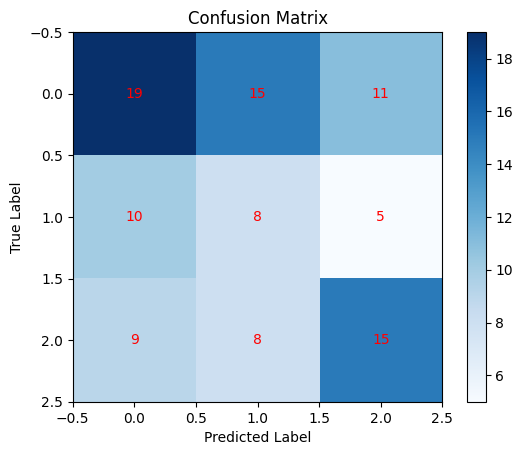

In [8]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()